To access files in your Google Drive, you can mount it to your Colab environment using the following code. This will open a new tab and ask you to authorize access to your Google Drive account.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
filepath='/content/drive/MyDrive/Deep Learning/Churn_Modelling.csv'
df=pd.read_csv(filepath)

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [3]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
x=ohe.fit_transform(df[["Geography","Gender"]])

In [ ]:
x.shape

(10000, 5)

In [ ]:
x

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [5]:
ohe.get_feature_names_out(["Geography", "Gender"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(columns=["Geography","Gender"],inplace=True)

In [ ]:
x.ndim

2

In [ ]:
type(x)

numpy.ndarray

In [7]:
df2=pd.DataFrame(
    x,
    columns=ohe.get_feature_names_out(["Geography", "Gender"])
)

In [8]:
df2

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [9]:
df2.drop(columns=["Geography_France","Gender_Female"],inplace=True)

In [10]:
df2

,Geography_Germany,Geography_Spain,Gender_Male
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,0.0,0.0,1.0
9997,0.0,0.0,0.0
9998,1.0,0.0,1.0


In [11]:
df=pd.concat([df,df2],axis=1)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0


In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [13]:
x=df.drop(columns=["Exited"])
y=df["Exited"]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4004,530,41,4,0.00,2,0,1,147606.71,0.0,1.0,0.0
9121,618,40,0,0.00,1,1,0,119059.13,0.0,0.0,0.0
1800,713,59,3,0.00,2,1,1,62700.08,0.0,0.0,0.0
1081,461,35,8,0.00,1,1,0,132295.95,0.0,1.0,0.0
8230,758,32,4,162657.64,2,1,1,115525.13,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8444,792,70,3,0.00,2,1,1,172240.27,0.0,0.0,0.0
7571,718,52,8,79475.30,3,1,1,32421.32,0.0,0.0,1.0
4030,603,42,6,0.00,1,1,1,90437.87,0.0,1.0,0.0
9526,642,18,5,111183.53,2,0,1,10063.75,1.0,0.0,1.0


In [ ]:
y_train

,Exited
4004,0
9121,0
1800,0
1081,0
8230,0
...,...
8444,0
7571,1
4030,0
9526,0


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-1.24955805e+00,  1.96300818e-01, -3.46947306e-01, ...,
        -5.80621947e-01,  1.73320628e+00, -1.10191942e+00],
       [-3.37298789e-01,  1.01136199e-01, -1.72731704e+00, ...,
        -5.80621947e-01, -5.76965369e-01, -1.10191942e+00],
       [ 6.47526545e-01,  1.90926396e+00, -6.92039740e-01, ...,
        -5.80621947e-01, -5.76965369e-01, -1.10191942e+00],
       ...,
       [-4.92797526e-01,  2.91465437e-01,  3.43237562e-01, ...,
        -5.80621947e-01,  1.73320628e+00, -1.10191942e+00],
       [-8.85008103e-02, -1.99248542e+00, -1.85487183e-03, ...,
         1.72229108e+00, -5.76965369e-01,  9.07507376e-01],
       [-1.76788717e+00,  5.97157986e-03, -1.85487183e-03, ...,
        -5.80621947e-01,  1.73320628e+00,  9.07507376e-01]])

In [ ]:
X_test

array([[-0.00556815, -1.80215619,  1.03342243, ..., -0.58062195,
         1.73320628,  0.90750738],
       [ 0.48166123, -0.08919304,  0.34323756, ...,  1.72229108,
        -0.57696537, -1.10191942],
       [ 0.84449161,  0.29146544,  1.37851487, ...,  1.72229108,
        -0.57696537,  0.90750738],
       ...,
       [ 0.83412503, -0.18435766, -0.69203974, ...,  1.72229108,
        -0.57696537,  0.90750738],
       [ 0.24322983,  0.67212391, -1.03713217, ..., -0.58062195,
        -0.57696537,  0.90750738],
       [-0.11960056, -1.13600385, -0.69203974, ...,  1.72229108,
        -0.57696537,  0.90750738]])

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (552.00 B)

 Trainable params: 138 (552.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# compilation
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [40]:
history=model.fit(X_train,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8736 - loss: 0.3126 - val_accuracy: 0.8575 - val_loss: 0.3400
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8690 - loss: 0.3220 - val_accuracy: 0.8544 - val_loss: 0.3400
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8690 - loss: 0.3259 - val_accuracy: 0.8537 - val_loss: 0.3404
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.3119 - val_accuracy: 0.8562 - val_loss: 0.3416
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8722 - loss: 0.3133 - val_accuracy: 0.8562 - val_loss: 0.3399
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8685 - loss: 0.3168 - val_accuracy: 0.8575 - val_loss: 0.3397
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8718 - loss: 0.3093 - val_accuracy: 0.8569 - val_loss: 0.3417
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8688 - loss: 0.3205 - val_accu

In [31]:
model.layers[0].get_weights()

[array([[-0.1485242 , -0.24066278, -0.26876488,  0.06866595, -0.20367162],
        [ 0.08266904, -0.6070375 ,  0.11948605, -0.87832916,  0.9076488 ],
        [ 0.13139933,  0.2749772 ,  0.16506442, -0.05749964,  0.28398982],
        [ 0.3832015 , -0.02248669, -0.30624396,  0.03714706, -0.07760765],
        [ 1.3018981 ,  0.24451388, -1.0744432 ,  0.11522529,  0.03931561],
        [-0.1370253 , -0.09001475, -0.05564579, -0.00137742,  0.05433462],
        [-0.23652431, -0.2643802 , -0.62975425, -0.13460153,  0.8349363 ],
        [ 0.03798361, -0.08427373,  0.01414382,  0.06039094, -0.11843057],
        [-0.03915428, -0.19911012,  0.50857216,  0.08737384,  0.04907146],
        [ 0.14662358,  0.04289826,  0.01928575, -0.04446548,  0.1508548 ],
        [-0.11228015,  0.1605493 , -0.11741232, -0.07449166,  0.14340027]],
       dtype=float32),
 array([-0.32290623,  1.0275254 ,  0.6425092 ,  1.2092444 , -0.64808553],
       dtype=float32)]

In [32]:
model.layers[1].get_weights()

[array([[-0.1012162 ,  0.00370349,  0.22627072,  0.41995966, -0.35133278,
         -0.38349503, -0.46479812,  0.45549017,  1.1409422 , -0.26466691,
          0.12986094],
        [-0.48075232, -0.32205582, -0.25385588, -0.31930387,  0.5733754 ,
          0.1315332 ,  0.3471357 , -0.44227335,  0.38044786,  0.65846026,
          0.60711664],
        [-0.11520148,  0.35132644,  0.09551464,  0.3070034 , -0.21282877,
         -0.5524133 ,  0.22533454,  0.13094246, -1.6218909 , -0.83410794,
         -0.12611309],
        [ 0.28647754, -0.9079923 ,  0.77237713,  0.1638675 , -0.23738019,
          0.25158796,  0.44199955, -0.553408  , -0.34004727, -0.3340513 ,
          0.49094763],
        [ 0.57998633, -0.32000992,  0.32609037, -0.4185301 , -0.3441229 ,
          0.17789449, -0.574798  , -0.2910242 , -0.5328512 , -0.09357789,
         -0.71605915]], dtype=float32),
 array([ 0.0571675 ,  0.73347205,  0.27109095, -0.32274336,  0.5947859 ,
         0.5440379 , -0.34612948,  0.45762023, -0.26814

In [34]:
model.layers[2].get_weights()

[array([[-1.0209703 ],
        [ 1.3947829 ],
        [-0.21601263],
        [ 0.33731878],
        [-0.5445463 ],
        [-0.98886925],
        [ 0.5645354 ],
        [ 1.6655612 ],
        [ 1.345882  ],
        [-1.158076  ],
        [-0.71915716]], dtype=float32),
 array([-0.27286124], dtype=float32)]

In [35]:
y_log=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [24]:
import numpy as np

In [36]:
y_pred=np.where(y_log>0.5,1,0)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

84.3

In [42]:
history.history

{'accuracy': [0.8706250190734863,
  0.8696874976158142,
  0.8706250190734863,
  0.8706250190734863,
  0.8698437213897705,
  0.8709375262260437,
  0.8707812428474426,
  0.87109375,
  0.8696874976158142,
  0.8714062571525574,
  0.8712499737739563,
  0.8723437786102295,
  0.8720312714576721,
  0.871874988079071,
  0.8726562261581421,
  0.8714062571525574,
  0.8707812428474426,
  0.8714062571525574,
  0.8712499737739563,
  0.8712499737739563,
  0.8709375262260437,
  0.8720312714576721,
  0.870312511920929,
  0.8729687333106995,
  0.8706250190734863,
  0.8725000023841858,
  0.8707812428474426,
  0.8712499737739563,
  0.87109375,
  0.8729687333106995,
  0.8712499737739563,
  0.8720312714576721,
  0.8717187643051147,
  0.8723437786102295,
  0.8706250190734863,
  0.871874988079071,
  0.8723437786102295,
  0.8717187643051147,
  0.8714062571525574,
  0.8704687356948853,
  0.87109375,
  0.8706250190734863,
  0.8721874952316284,
  0.8692187666893005,
  0.8723437786102295,
  0.8714062571525574,
  0

In [44]:
import matplotlib.pyplot as plt

In [45]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

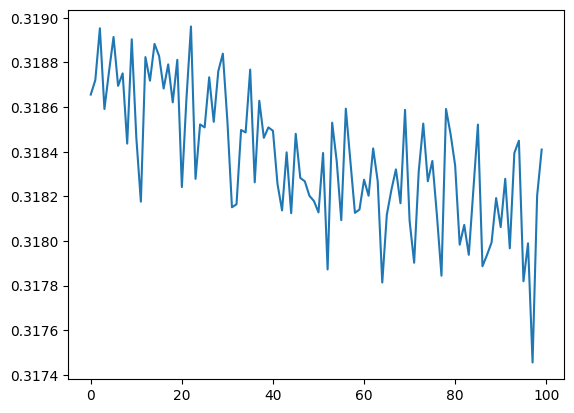

In [52]:
plt.plot(history.history["loss"])

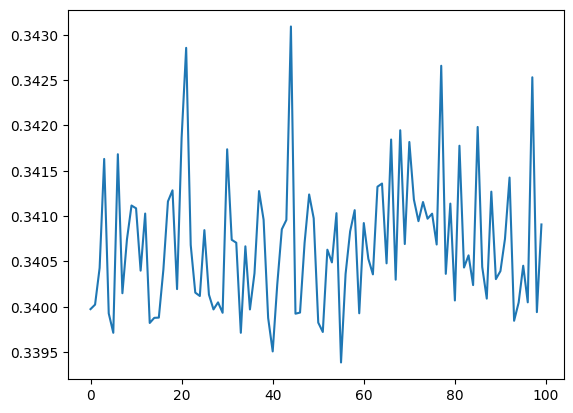

In [53]:
plt.plot(history.history["val_loss"])

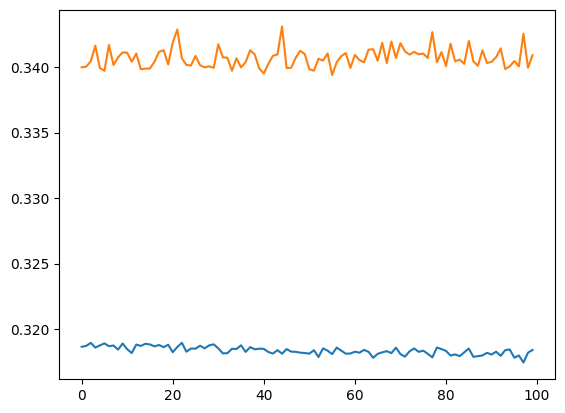

In [50]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

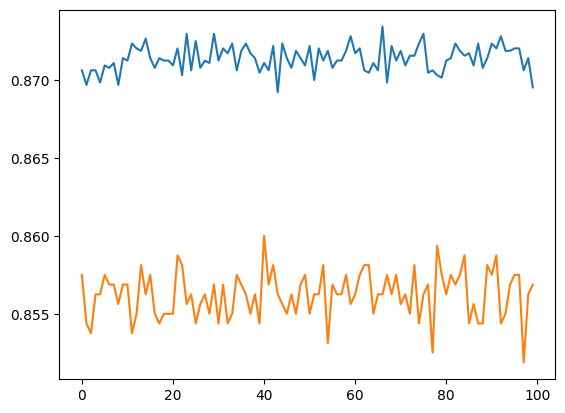

In [51]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

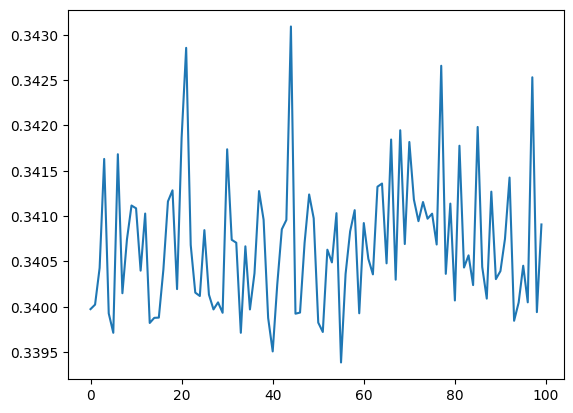

In [48]:
plt.plot(history.history["val_loss"])